In [132]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy

In [128]:
def activation(x):
    y = 1.0 / (1 + numpy.exp(-x))
    return y

In [129]:
#def RBM_(n_v,n_h, biases): dont make  biases as an agurment cuz it will cause a disaster based on tests 

def RBM_(n_v,n_h):  
    #dont use numpy.random.rand use numpy.random.randn cuz in rand case we to increase the number of the iterations
    weights = 0.1 * numpy.random.randn(n_v,n_h)  
    #adding the baises 
    weights = numpy.insert(weights, 0, 0, axis = 0)
    weights = numpy.insert(weights, 0, 0, axis = 1)
    return weights

In [137]:
def training(input_vector,weights,num_hidden,iteration,learning_rate):
    
    #adding the bais to the first row 
    input_vector = numpy.insert(input_vector, 0, 1, axis = 1)
    
    for i in range(iteration):  
        
        #<v.w>for all values 
        data_W = numpy.dot(input_vector, weights)  
        
        # caluate the sigm(v.w)
        out_act_hidden = activation(data_W) 
        
        # hidden statues accept zero or 1  #+1 cuz of the biases
        # graphical model
        # use numpy.random.rand not numpy.random.randn
        # length of input vector 
        L = input_vector.shape[0]
    
        _hidden_status_ = out_act_hidden > numpy.random.rand(L,num_hidden + 1) 
        
        #  (V_up) = v.sigm(v.w)
        _in_to_out_ = numpy.dot(input_vector.T, out_act_hidden)
        
        # a matrix of ones and zeros  []. W^T
        _hidden_weights_ = numpy.dot(_hidden_status_, weights.T)  
        
        # sigm([].W^T)
        _out_down_up_ = activation (_hidden_weights_) 
        
         # (sigm([].W^T).W)
        hidden_input = numpy.dot(_out_down_up_,weights)
        
        
        # sigm((sigm([].W^T).W))
        out_act_hidden_1 = activation(hidden_input) 
        
        # V_down = sigm([].W^T) . sigm((sigm([].W^T).W))
        _out_to_in_ = numpy.dot(_out_down_up_.T, out_act_hidden_1)
        
        
        #  W = W + (V_down - V_up /L)*learning_rate from RBM theory
        weights = weights + ((_in_to_out_- _out_to_in_) / L) *learning_rate 
        
        # (v-v')^2 based on CE
        Er = numpy.sum((input_vector - _out_down_up_) ** 2) 
        
        
        #print(weights)
        print("iteration %s: error = %s" % (i, Er))
    
    #print(_hidden_weights_)
    print(weights)

In [138]:
w=RBM_(4,1)
training_data = numpy.array([[1,1,1,0],[1,0,1,0], [0,0,1,1],[0,0,1,1]])
training(training_data,w,1,5000,0.1)



iteration 0: error = 5.0545035977
iteration 1: error = 4.83372384465
iteration 2: error = 4.80899929845
iteration 3: error = 4.87946536361
iteration 4: error = 4.68258186496
iteration 5: error = 4.67344170606
iteration 6: error = 4.70639202971
iteration 7: error = 4.50051524594
iteration 8: error = 4.6714506595
iteration 9: error = 4.49923768339
iteration 10: error = 4.53775534993
iteration 11: error = 4.18278345841
iteration 12: error = 4.35900423332
iteration 13: error = 3.99372374747
iteration 14: error = 3.77335637446
iteration 15: error = 4.3031010776
iteration 16: error = 3.81119283892
iteration 17: error = 3.66538839998
iteration 18: error = 3.82854000689
iteration 19: error = 3.87428306714
iteration 20: error = 3.51635001616
iteration 21: error = 3.48086751307
iteration 22: error = 4.22516065855
iteration 23: error = 3.50400181763
iteration 24: error = 3.49980133855
iteration 25: error = 3.52359864226
iteration 26: error = 3.22767875112
iteration 27: error = 3.09793799221
itera

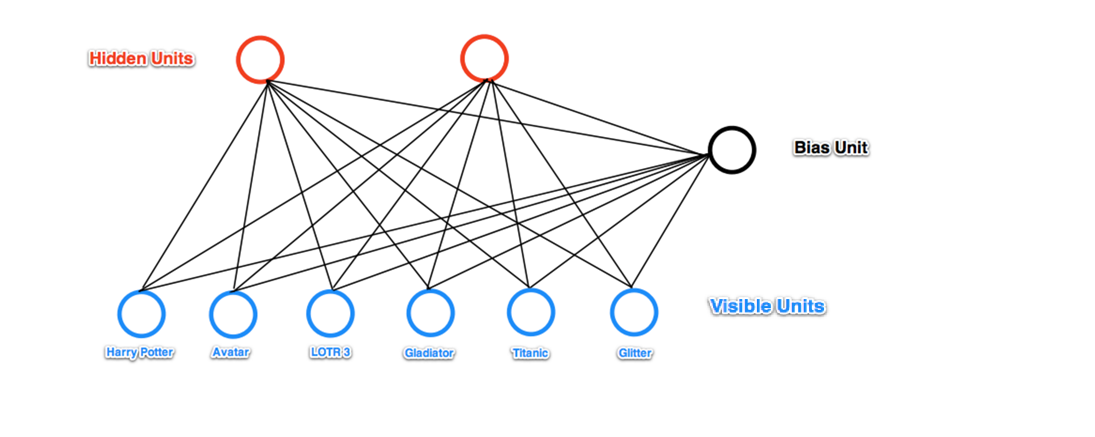

In [1]:
from IPython.display import Image
Image(filename='C:\RBM.png')
#  I used the same example to check the output of my code 
#  http://blog.echen.me/2011/07/18/introduction-to-restricted-boltzmann-machines/

In [109]:
#Alice: (Harry Potter = 1, Avatar = 1, LOTR 3 = 1, Gladiator = 0, Titanic = 0, Glitter = 0). Big SF/fantasy fan.
#Bob: (Harry Potter = 1, Avatar = 0, LOTR 3 = 1, Gladiator = 0, Titanic = 0, Glitter = 0). SF/fantasy fan, but doesn't like Avatar.
#Carol: (Harry Potter = 1, Avatar = 1, LOTR 3 = 1, Gladiator = 0, Titanic = 0, Glitter = 0). Big SF/fantasy fan.
#David: (Harry Potter = 0, Avatar = 0, LOTR 3 = 1, Gladiator = 1, Titanic = 1, Glitter = 0). Big Oscar winners fan.
#Eric: (Harry Potter = 0, Avatar = 0, LOTR 3 = 1, Gladiator = 1, Titanic = 1, Glitter = 0). Oscar winners fan, except for Titanic.
#Fred: (Harry Potter = 0, Avatar = 0, LOTR 3 = 1, Gladiator = 1, Titanic = 1, Glitter = 0). Big Oscar winners fan.


In [131]:
w=RBM_(6,2)
training_data = numpy.array([[1,1,1,0,0,0],[1,0,1,0,0,0],[1,1,1,0,0,0],[0,0,1,1,1,0], [0,0,1,1,0,0],[0,0,1,1,1,0]])
training(training_data,w,2,5000,0.1)




iteration 0: error = 10.6410931375
iteration 1: error = 10.2956063811
iteration 2: error = 10.2840164001
iteration 3: error = 9.96785489193
iteration 4: error = 9.87544356464
iteration 5: error = 9.60371343371
iteration 6: error = 9.77354035754
iteration 7: error = 9.53646985558
iteration 8: error = 8.77389019974
iteration 9: error = 8.8831740989
iteration 10: error = 8.69571156167
iteration 11: error = 8.37813649412
iteration 12: error = 8.60642854335
iteration 13: error = 8.80960560651
iteration 14: error = 9.06121491949
iteration 15: error = 8.19076432357
iteration 16: error = 7.64844007868
iteration 17: error = 7.49278737905
iteration 18: error = 7.71433946862
iteration 19: error = 7.60447690008
iteration 20: error = 6.70996423191
iteration 21: error = 7.08693459659
iteration 22: error = 6.66243446516
iteration 23: error = 6.36751987047
iteration 24: error = 6.23221868815
iteration 25: error = 6.36150858896
iteration 26: error = 6.83774131587
iteration 27: error = 6.59008299828
ite